In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import os
import ntpath
import re

from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
import matplotlib as mpl
from matplotlib import rc, rcParams

In [2]:
# read the .out files and get gap values

gauss_outs = []
output_counter = 0
gaps_read_counter = 0
output_names = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

In [3]:
gauss_outs

['CCqOrdNCqCCqdOrOrCqdOrO.out']

In [6]:
gaps_dft = []
for gauss in gauss_outs:
    convergence_check = 0
    f = open(gauss,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    if '### All Done ###\n' in liness:
        if liness[-2][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        print (homo_gap)
                        lumo_gap = liness[count+1].split()
                        print (lumo_gap)
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.2114 (eV) 
                        gaps_dft.append(27.2113825435*(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:
            print ("gauss did not converged properly1", gauss)
    else:
        if liness[-1][1:7]=='Normal':
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    homo_count += 1
            counter = 0
            for count, line in enumerate(liness):
                if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
                    counter += 1
                    if counter == homo_count:
                        gaps_read_counter += 1
                        convergence_check = 1
                        homo_gap = liness[count].split()
                        print (homo_gap)
                        lumo_gap = liness[count+1].split()
                        print (lumo_gap)
                        output_names.append(gauss)
                        #print (gap_line[2])
                        # 1 Hurtree = 27.2114 (eV) 
                        gaps_dft.append(27.2113825435*(float(lumo_gap[4]) - float (homo_gap[-1])))
        else:   
            print ("gauss did not converged properly2", gauss)

['Alpha', 'occ.', 'eigenvalues', '--', '-0.25386']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.01661', '0.00126', '0.02261', '0.03184', '0.04699']


In [7]:
gaps_dft

[6.455900508445374]

In [5]:
liness[-2][1:7]=='Normal'

True

In [6]:
'Normal' in liness

False

In [7]:
len (gaps_dft)

46

In [8]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        output_names[jj] = output_names[jj].replace("q","(")
        output_names[jj] = output_names[jj].replace("r",")")
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

Total output files:  57
Total successfully read gaps:  46
all done
output names before conversion--------------------->
 ['CC1qCr[C]2[CH]CCC1C2', 'OdCqOrc1cccnc1', 'CCqOrCqCrOCqdOrCqCrqCrC', 'OdC1CSCqdOrCS1', 'CP1qdOrCCCO1', 'CCCSCqCqdNrOrc1ccccn1', 'CCC1dCCqCrqCrCCqCrdC1', 'CCqCrCCqdOrOCqCrC', 'CtCCCCqCrqCrC', 'NCCCCNCCCCN', 'OCdNNqc1ccccc1rc1ccccc1', 'CCqCrqOrCOC1CCNCC1', 'CCqCrC1qCrCCCC1C', 'OdCqOrCSCSCCqdOrO', 'COc1ccc2cqc1CCdOrOCqdOrNqCrC2', 'CCCCn1ccnc1', 'CCqOrdNc1nncq-c2ccccc2Crs1', 'CCCC1CC1CCC', 'CCOCqdOrCn1ccnc1[N+]qdOr[O-]', 'OdC1CdCCqdOrCqc2cccc3cccnc23rdC1', 'CCqdOrOCCOCCOCCCqCrC', 'CNqCrSqNrqdOrdO', 'CdCqCrCqdOrOCC1CO1', 'OdC1CCdCCdC1CqOrdCqOrO', 'Cc1ccc2cqc1rCCCC2', 'Cc1ccc2cqc1rCCdC2', 'COc1cccc2nc3ccccc3nc12', 'COCqdOrc1ccqOCrccqOCrc1', 'CdC1CqdOrOC2CqOCdOrCCCC12', 'CCOCqdSrSCqdOrc1ccco1', 'CCqOrdNCqCCqdOrOrCqdOrO', 'CCqCrqOrC1CCCN1', 'OdS1Oc2ccccc2O1', 'CCqCrqCrCCCCOCOCqCrqCrC', 'CCCCCSCtN', 'CC1qOrCCCqCrqOrCC1', 'CCqCrCOCCCN', 'Cn1nccc1CNc1cccqCtNrcc1', 'CC1qCrCCC2q

In [9]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in output_names:
    dft_smiles_gap['SMILES'] = output_names 
    dft_smiles_gap['DFT_gap'] = gaps_dft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 
merged_output["RE"] = np.abs((merged_output["DFT_gap"] - merged_output["gap_pubchemqc"])/ merged_output["gap_pubchemqc"]*100)
output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_gaps), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE"])), min(merged_output["RE"]), max(merged_output["RE"])))
print ("Total samples wrote in the output: ",len(output))

average of RE: 2.3953595116318316 and Min: 0.03296363654323551 and Max: 9.42561778636144
Total samples wrote in the output:  46


In [10]:
output.sort_values('RE')

,SMILES,gap_pubchemqc,DFT_gap,RE
42,CCC(C)C(=O)c1ccccc1,5.13500,5.136693,0.032964
36,COc1cccc2nc3ccccc3nc12,3.42300,3.421559,0.042091
13,Cc1ccc2c(c1)CCCC2,6.13900,6.134806,0.068314
2,C=C1C(=O)OC2C(OC=O)CCCC12,5.97300,5.968000,0.083703
17,C#CCCC(C)(C)C,8.54700,8.556891,0.115729
16,CCCCn1ccnc1,6.88500,6.896181,0.162392
4,Cc1ccc(C)c2c1CC(C(=O)O)CC2C,6.23400,6.248278,0.229029
40,Cc1ccc2c(c1)CC=C2,5.17300,5.187578,0.281809
45,CC1(O)CCC(C)(O)CC1,8.49500,8.521517,0.312143
34,CP1(=O)CCCO1,8.71900,8.747643,0.328514


In [11]:
## Statistics  (# DFT=True value, Des=prediction)

# total # of samples
N = len(merged_output["gap_pubchemqc"])
print ("number of samples: ", N)
# Explained Variance R2 from sklearn.metrics.explained_variance_score
explained_variance_R2_DFT_des = explained_variance_score(merged_output["DFT_gap"], merged_output["gap_pubchemqc"])
print ("explained_varice_R2_DFT_des", explained_variance_R2_DFT_des)

# mean absolute error 
MAE_DFT_des = mean_absolute_error(merged_output["DFT_gap"], merged_output["gap_pubchemqc"])
print ("MAE_DFT_des", MAE_DFT_des)
MAE_DFT_des_=0
for dft, des in zip(merged_output["DFT_gap"], merged_output["gap_pubchemqc"]):
    MAE_DFT_des_ = MAE_DFT_des_ + abs(des-dft)
MAE_DFT_des = MAE_DFT_des_/N
print ("MAE_DFT_des_manuallycal:", MAE_DFT_des)
# Fractioned MAE, more normalized
Fractioned_MAE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["gap_pubchemqc"]):
    Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des +  abs(des-dft)/des
Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des/N
print ("FMAE_DFT_des_manuallycal", Fractioned_MAE_DFT_des)

# root mean squared error (RMSE), sqrt(sklearn ouputs MSE)
RMSE_DFT_des = mean_squared_error(merged_output["DFT_gap"], merged_output["gap_pubchemqc"])**0.5
print ("RMSE_DFT_des", RMSE_DFT_des)

Fractioned_RMSE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["gap_pubchemqc"]):
    Fractioned_RMSE_DFT_des = Fractioned_RMSE_DFT_des + ((des-dft)/des)**2
Fractioned_RMSE_DFT_des = (Fractioned_RMSE_DFT_des/N)**0.5
print ("Fractioned_RMSE_DFT_des", Fractioned_RMSE_DFT_des)



number of samples:  46
explained_varice_R2_DFT_des 0.9875583926218978
MAE_DFT_des 0.13941628442920276
MAE_DFT_des_manuallycal: 0.13941628442920276
FMAE_DFT_des_manuallycal 0.023953595116318324
RMSE_DFT_des 0.20470884192641112
Fractioned_RMSE_DFT_des 0.03524815927459536


In [12]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

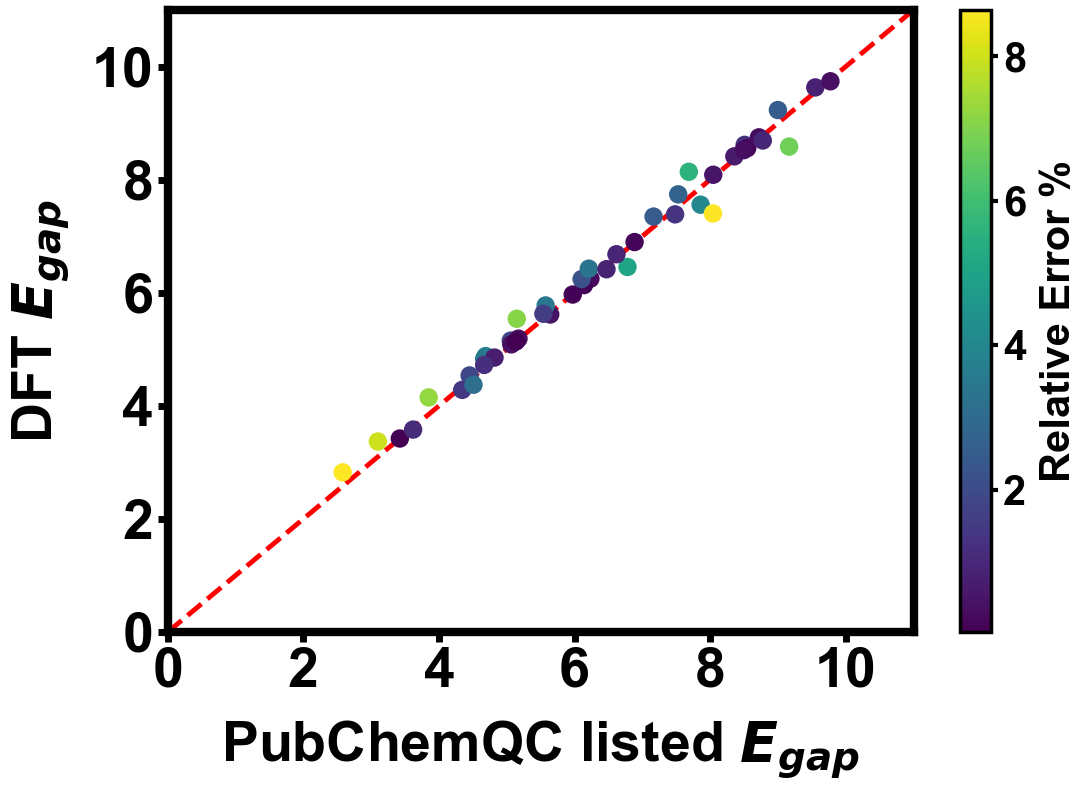

In [13]:
from scipy.optimize import curve_fit
import matplotlib as mpl

gap_range = (0, 11)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_gap = output["gap_pubchemqc"]
DFT_gap = output["DFT_gap"]


col = np.abs((DFT_gap-Desired_gap)/DFT_gap*100)
col_orig = np.copy(col)



mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (14*0.8, 10*0.8))
plt.scatter(Desired_gap, DFT_gap, s=150, c=col_orig)

ax.tick_params(axis='both', which='major', labelsize=25)

plt.xlabel(r'PubChemQC listed $E_{gap}$', fontsize=40, fontname='Arial', fontweight="bold", labelpad=15)
plt.ylabel(r'DFT $E_{gap}$', fontsize=40, fontname='Arial', fontweight="bold", labelpad=15)

ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)
[i.set_linewidth(6) for i in ax.spines.values()]

plt.xlim(gap_range)
plt.ylim(gap_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
ax.grid(False)

lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)

plt.xticks ((0, 2, 4, 6, 8, 10))
plt.yticks ((0, 2, 4, 6, 8, 10))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_Des.png', dpi = 500, bbox_inches='tight')